In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_dir = os.getcwd()
file_list = os.listdir(path_dir)
file_list.sort()

In [3]:
# AJL_files = []
AJL_max_list = []
AJL_min_list = []
AJL_mean_list = []
columns = ["1000","500","100","50"]
for filename in file_list:
    if 'AJL' in filename:
#         AJL_files.append(pd.read_csv(path_dir+'/'+filename, names=['iter','AJL']).drop('iter',axis=1))
        df = pd.read_csv(path_dir+'/'+filename, names=['iter','AJL']).drop('iter',axis=1)
        df.loc[df['AJL'] == 0.0] = max(df['AJL'])-0.1
        AJL_max_list.append(max(df['AJL']))
        AJL_min_list.append(min(df['AJL']))
        AJL_mean_list.append((max(df['AJL'])+min(df['AJL']))/2)
        print(filename)
        
print(AJL_max_list)
print(AJL_min_list)

1_1000_AJL.csv
2_500_AJL.csv
3_100_AJL.csv
4_50_AJL.csv
[44.36363596033058, 45.047618833106576, 50.68421025955679, 55.99999998852458]
[39.9999960000004, 39.9999960000004, 39.9999960000004, 39.9999960000004]


SAVED!


<module 'matplotlib.pyplot' from '/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/matplotlib/pyplot.py'>

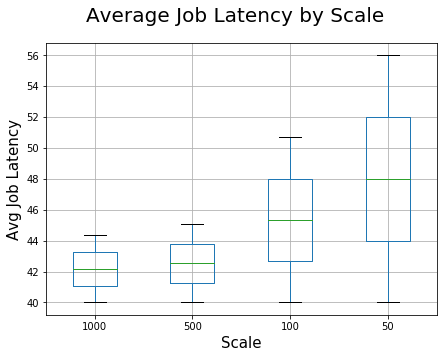

In [4]:
dg = pd.DataFrame([AJL_min_list, AJL_max_list],
                  columns = columns)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
boxplot = dg.boxplot(column = columns)
fig.suptitle("Average Job Latency by Scale", fontsize = 20)
plt.xlabel('Scale', fontsize=15)
plt.ylabel('Avg Job Latency', fontsize=15)
fig.savefig(os.getcwd()+'/avg_job_latency.png')
print("SAVED!")
plt